In [1]:
# Harbinger Package
# version 1.0.50

source("https://raw.githubusercontent.com/cefet-rj-dal/harbinger/master/examples/jupyter_harbinger.R")

#loading Harbinger
load_harbinger() 

Warning message:
“replacing previous import ‘dplyr::rename’ by ‘reshape::rename’ when loading ‘daltoolbox’”
Warning message:
“replacing previous import ‘class::condense’ by ‘reshape::condense’ when loading ‘daltoolbox’”
Warning message:
“replacing previous import ‘dplyr::filter’ by ‘stats::filter’ when loading ‘daltoolbox’”
Warning message:
“replacing previous import ‘TSPred::minmax’ by ‘daltoolbox::minmax’ when loading ‘harbinger’”
Warning message:
“replacing previous import ‘TSPred::evaluate’ by ‘daltoolbox::evaluate’ when loading ‘harbinger’”


In [2]:
#loading the example database
data(har_examples)

In [3]:
#Using the time series 1 
dataset <- har_examples[[14]]
head(dataset)

,serie,event
,<dbl>,<lgl>
1,-1.1597821,FALSE
2,-1.5782775,FALSE
3,-1.5653926,FALSE
4,-0.7182375,FALSE
5,0.6003753,FALSE
6,0.1899022,FALSE


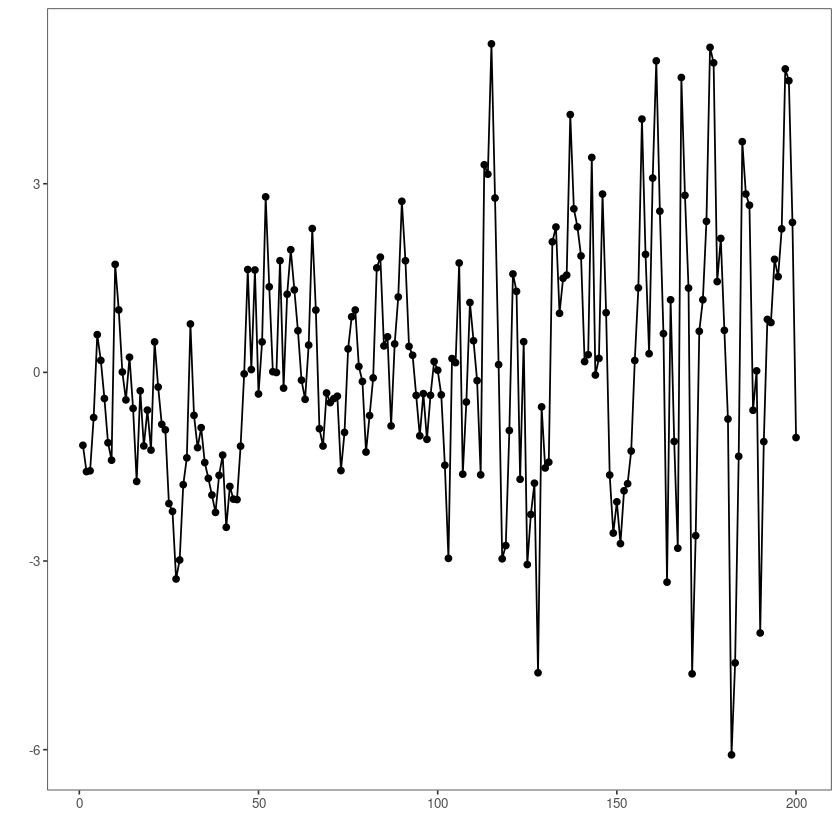

In [4]:
#ploting serie #1
ts_plot(x = 1:length(dataset$serie), y = dataset$serie)

In [5]:
# establishing change finder arima method 
  model <- hcp_garch()

In [6]:
# fitting the model
  model <- fit(model, dataset$serie)

In [7]:
# making detections using hanr_fbiad
  detection <- detect(model, dataset$serie)

In [8]:
# filtering detected events
  print(detection |> dplyr::filter(event==TRUE))

  idx event    type
1 101  TRUE hcp_scp
2 169  TRUE hcp_scp
3 172  TRUE hcp_scp


In [9]:
# evaluating the detections
  evaluation <- evaluate(model, detection$event, dataset$event)
  print(evaluation$confMatrix)

          event      
detection TRUE  FALSE
TRUE      0     3    
FALSE     1     196  


Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.


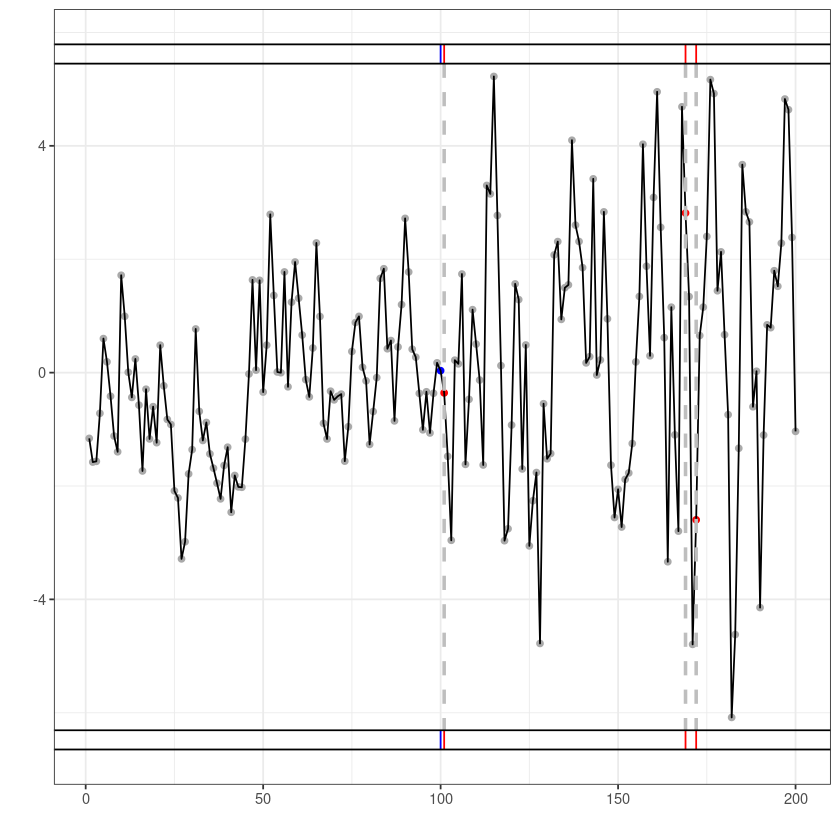

In [10]:
# ploting the results
  grf <- har_plot(model, dataset$serie, detection, dataset$event)
  plot(grf)